In [317]:
# classifying CIFAR Images

import numpy as np
import matplotlib.pyplot as plt
import random
import pickle as p
from PIL import Image

# import CIFAR-10 images as their websit
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = p.load(fo, encoding='bytes')
    return dict


#load data
traindata=np.ones((1,3073))
for i in range(5):
    lo='/Users/dl/Documents/RIT related/CIFAR/cifar-10-batches-py/data_batch_'
    b=['1','2','3','4','5']
    path=lo+b[i]
    data= unpickle(path)
    X=data[b'data']
    Y=np.array(data[b'labels'])
    D=np.c_[Y,X] 
    traindata=np.vstack((traindata,D))
traindata=traindata[1:,:]    #(50000, 3073)

data2 =unpickle('/Users/dl/Documents/RIT related/CIFAR/cifar-10-batches-py/test_batch')
X2=data2[b'data']
Y2=data2[b'labels']
testdata=np.c_[Y2,X2]   #(10000, 3073)
print(traindata.shape)

(50000, 3073)


In [318]:
def onehot_encode(Label):
    Lab=np.unique(Label)
    L=np.zeros((len(Label),len(Lab)))
    for i in range(len(Label)):  
        for j in range(len(Lab)):
            if Label[i]==Lab[j]:
                L[i,j]=1
    return L

def normdata (data):         # normalize data to (-1,1)
    m=np.mean(data,axis=0)   
    k=np.max(data,axis=0)-np.min(data,axis=0)
    Ndata=(data-m)/k 
    return Ndata
#Xnorm=normdata (X)   #(10000, 3072)

def softmax(x):
    exp_x=np.exp(x-np.max(x))
    partition=np.sum(exp_x,axis=1,keepdims=True)
    return exp_x/partition

# compute loss and gradW         
def softloss (Y,X,W,grad_):
    linear=np.dot(X,W)         
    P=softmax(linear)
    Reg=0.5*alpha*(np.linalg.norm(W)**2)   # L2 norm
    SoftLoss=-np.sum(Y*np.log(P))+Reg    
    grad=mtum*grad_[-1]+np.dot(X.T,(P-Y))+alpha*W   #    
    return SoftLoss,grad
   

def Acc_compute(X,Y,W):  
    
    Y_pred=softmax(np.dot(X,W))      #N*3
    N=Y_pred.shape[0]   
    count= np.sum(np.argmax(Y_pred, axis=1)==np.argmax(Y, axis=1))  # as row  axis=1
    acc=count/N
    return acc  
   
def data_processing(data):
    #normalize data and add bias, #data formate first col is label    
    NormD=normdata (data[:,1:data.shape[1]])   
    bias1=np.ones((data.shape[0],1)) 
    B_data=np.c_[bias1,NormD]
    Label=onehot_encode(data[:,0]) 
    return B_data, Label

In [320]:
###### train model 
def model(tranindata, Epochs, Mini,alpha, rate, mtum):
    N=traindata.shape[0]  # 
    BSize=N//Mini 
    grad_=[0]
    W=np.random.uniform(low=-1, high=1, size=30730).reshape(3073,10)  # initialize W (X_col dim+1, Y_col dim)
    Sta_trAcc=[]
    loss1=[]
    # train model 
    for m in range(Epochs):
   
        np.random.shuffle(traindata)  #shuffle 
         #normalize data and add bias
        NormTr,TrainL=data_processing(traindata)

        # update W in train minibatch
        for i in range(BSize):
            X=NormTr[Mini*i:Mini*(i+1),:]
            Y=TrainL[Mini*i:Mini*(i+1),:]
            Loss,grad=softloss(Y,X,W,grad_)
            W=W-rate*grad                   
            grad_=np.append(grad_,grad)        

         #Loss and Accuracy compute of train sets
        TAcc=Acc_compute(NormTr,TrainL,W)      
        TLoss,grad1=softloss(TrainL,NormTr,W,grad_)
        loss1=np.append(loss1,TLoss/N)
        
        Sta_trAcc=np.append(Sta_trAcc,TAcc)
        print(m,'Epoches--','Loss:',TLoss/N,'Accuracy',TAcc)
        
        #early stopping
        if m >2 and  loss1[-2]-loss1[-1]<1e-3:
            rate=rate*0.8    
            if rate < 1e-7:
                break   
    return W, loss1, Sta_trAcc

#train model
#model(tranindata, Epochs, Mini,alpha, rate, mtum)
W, Loss1, Acc1=model(traindata,50 ,300 , 0.01, 1e-3, 0.01)

0 Epoches-- Loss: 3.6117130603942527 Accuracy 0.25944
1 Epoches-- Loss: 3.016722008274949 Accuracy 0.28332
2 Epoches-- Loss: 2.7306326470833535 Accuracy 0.29432
3 Epoches-- Loss: 2.569835445037928 Accuracy 0.30204
4 Epoches-- Loss: 2.4485743016346 Accuracy 0.31634
5 Epoches-- Loss: 2.3215571559122092 Accuracy 0.32324
6 Epoches-- Loss: 2.2753750188655117 Accuracy 0.32788
7 Epoches-- Loss: 2.189216653809717 Accuracy 0.3342
8 Epoches-- Loss: 2.137889283964987 Accuracy 0.34158
9 Epoches-- Loss: 2.0980748992152707 Accuracy 0.34586
10 Epoches-- Loss: 2.0672537741428645 Accuracy 0.34486
11 Epoches-- Loss: 2.042565131493902 Accuracy 0.34962
12 Epoches-- Loss: 2.0212499368622217 Accuracy 0.35558
13 Epoches-- Loss: 1.9937606152949712 Accuracy 0.35696
14 Epoches-- Loss: 1.98608190006816 Accuracy 0.36098
15 Epoches-- Loss: 1.9628138301109403 Accuracy 0.36538
16 Epoches-- Loss: 1.9304756282431088 Accuracy 0.37536
17 Epoches-- Loss: 1.9077588169577853 Accuracy 0.37752
18 Epoches-- Loss: 1.9028699031

Text(0, 0.5, 'Loss Value')

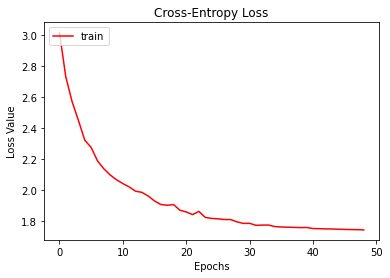

In [325]:
# plot Train Loss with epoches
A=np.arange(0,Loss1.shape[0]-1,1)
plt.plot(A,Loss1[1:],'-r')
plt.legend(('train', 'test'), loc='upper left') 
plt.title('Cross-Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')



In [323]:
        
def testmodel(testdata,W,alpha,rate,mtum):
    
    TestD=normdata (testdata[:,1:testdata.shape[1]])
    bias2=np.ones((testdata.shape[0],1))
    NormTs=np.c_[bias2,TestD]    
    TestL=onehot_encode(testdata[:,0])

    
    #compute SumLoss and Per-class Accuracy of test sets
    SAcc=Acc_compute(NormTs,TestL,W)    
    SLoss,grad2=softloss(TestL,NormTs,W,grad_)    
    
    print('TestSets','Loss:',SLoss/N)
    return  SAcc,SLoss
#test model
SAcc, SLoss=testmodel(testdata,W,0.001,0.00001,0.01)

TestSets Loss: [[3185.3573104 ]
 [ 616.52076976]
 [1470.16491249]]


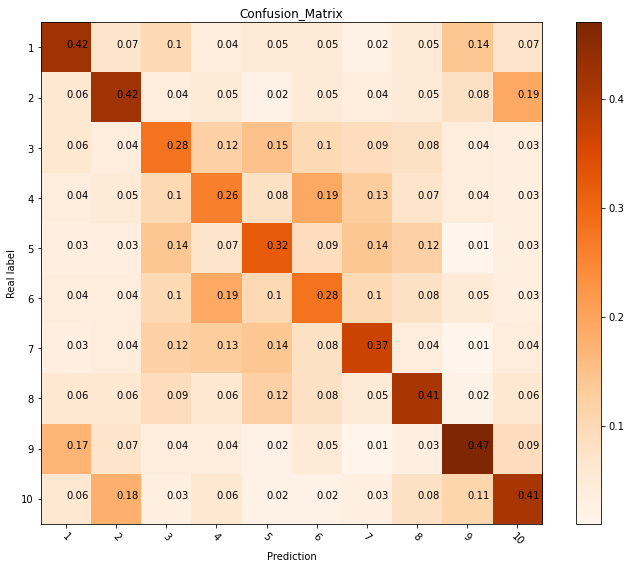

In [324]:
# confusion matrix 
def ConfusionM(testdata,W,alpha,rate,mtum):  
    
    TestD=normdata (testdata[:,1:testdata.shape[1]])
    bias2=np.ones((testdata.shape[0],1))
    X=np.c_[bias2,TestD]    
    Y=onehot_encode(testdata[:,0])
    
    Y_pred=softmax(np.dot(X,W))      #
    N=Y_pred.shape[0]   
    m=np.argmax(Y_pred, axis=1)  #col
    n=np.argmax(Y, axis=1)
    dim=np.unique(testdata[:,0]).shape[0]
    M=np.zeros((dim,dim))
    for i in range(testdata.shape[0]):
        M[m[i],n[i]] =M[m[i],n[i]]+1
        
    SS=np.sum(M,axis=1,keepdims=True)
    Norm=M/SS
    #print('confusion M:',Norm)
    Matrix=np.around(Norm, decimals=2)
    return Matrix

def plotconfusionM(confusion_matrix):
    classes = ['1','2','3','4','5','6','7','8','9','10']
    
    plt.figure(figsize=(10,8))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Oranges)  #show the matrix as pixels
    plt.title('Confusion_Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=-45)
    plt.yticks(tick_marks, classes)

    thresh = confusion_matrix.max() / 2.
    iters = np.reshape([[[i,j] for j in range(10)] for i in range(10)],(confusion_matrix.size,2))
    for i, j in iters:
        plt.text(j, i, format(confusion_matrix[i, j]))   

    plt.ylabel('Real label')
    plt.xlabel('Prediction')
    plt.tight_layout()
    plt.show()
    
    
#confusion Matrix
Matrix=ConfusionM(testdata,W,0.001,0.001,0.01)

#plot confusion Matrix
plotconfusionM(Matrix)



In [ ]:
#load data
traindata=np.ones((1,3073))
for i in range(5):
    lo='/Users/dl/Documents/RIT related/CIFAR/cifar-10-batches-py/data_batch_'
    b=['1','2','3','4','5']
    path=lo+b[i]
    data= unpickle(path)
    X=data[b'data']
    Y=np.array(data[b'labels'])
    D=np.c_[Y,X] 
    traindata=np.vstack((traindata,D))
traindata=traindata[1:,:]    #(50000, 3073)

data2 =unpickle('/Users/dl/Documents/RIT related/CIFAR/cifar-10-batches-py/test_batch')
X2=data2[b'data']
Y2=data2[b'labels']
testdata=np.c_[Y2,X2]   #(10000, 3073)
#print(traindata.shape)

#train model
#model(tranindata, Epochs, Mini,alpha, rate, mtum)
W, Loss1, Acc1=model(traindata, 100, 100, 0.001, 0.0001, 0.01)



0 Epoches-- Loss: 318902.1836182862 Accuracy 0.17334
1 Epoches-- Loss: 266850.57916598936 Accuracy 0.1985
2 Epoches-- Loss: 240996.73423864754 Accuracy 0.21462
3 Epoches-- Loss: 224203.32708920387 Accuracy 0.2244
4 Epoches-- Loss: 212014.73673109242 Accuracy 0.23296
5 Epoches-- Loss: 202720.15137805822 Accuracy 0.23916
6 Epoches-- Loss: 194826.14133577707 Accuracy 0.24358
7 Epoches-- Loss: 188328.9230808602 Accuracy 0.24782
8 Epoches-- Loss: 182717.6687792108 Accuracy 0.25284
9 Epoches-- Loss: 177839.29870027522 Accuracy 0.2564


TestSets Loss: 206275.14989278524


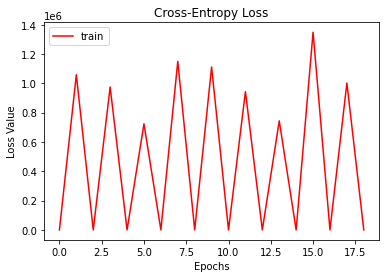

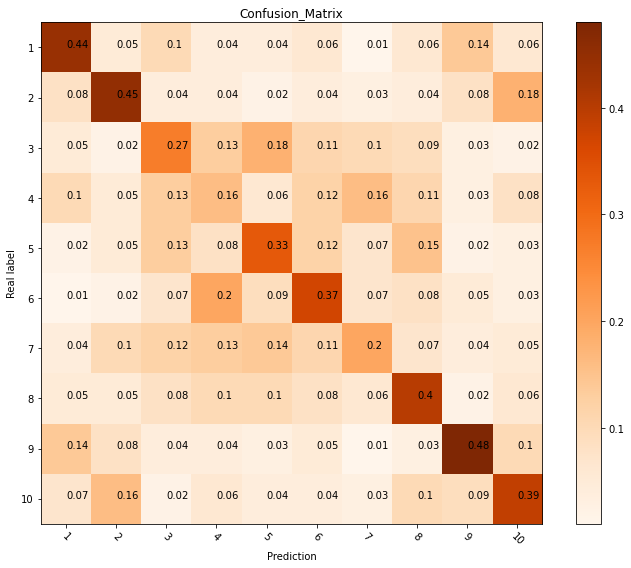

In [253]:

# plot Train Loss with epoches
A=np.arange(0,Loss1.shape[0]-1,1)
plt.plot(A,Loss1[1:],'-r')
plt.legend(('train', 'test'), loc='upper left') 
plt.title('Cross-Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')

#test model
SAcc, SLoss=testmodel(testdata,W,0.001,0.001,0.001)

#confusion Matrix
Matrix=ConfusionM(testdata,W,0.001,0.001,0.01)

#plot confusion Matrix
plotconfusionM(Matrix)


In [201]:
#前面是正式部分，下面是测试部分

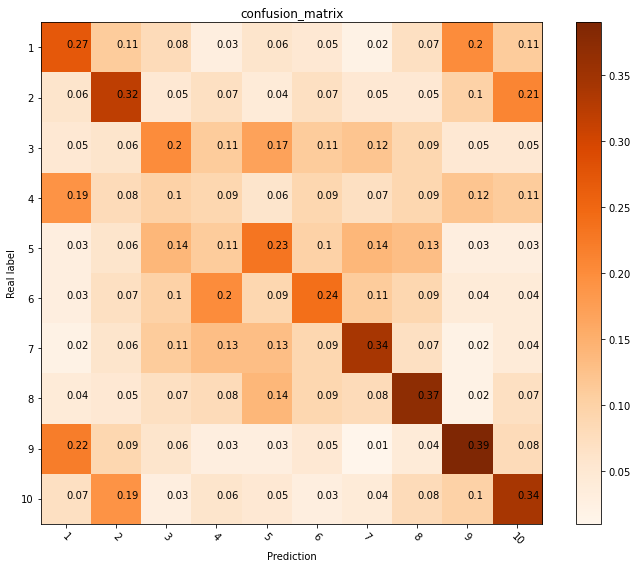

In [202]:
def plotconfusionM(confusion_matrix):
    classes = ['1','2','3','4','5','6','7','8','9','10']
    #confusion_matrix = np.array([(9,1,3,4,0),(2,13,1,3,4),(1,4,10,0,13),(3,1,1,17,0),(0,0,0,1,14)],dtype=np.float64)
    
    plt.figure(figsize=(10,8))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Oranges)  #show the matrix as pixels
    plt.title('Confusion_Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=-45)
    plt.yticks(tick_marks, classes)

    thresh = confusion_matrix.max() / 2.
    #thresh = confusion_matrix.max()
    #iters = [[i,j] for i in range(len(classes)) for j in range((classes))]
    #ij配对，遍历矩阵迭代器
    iters = np.reshape([[[i,j] for j in range(10)] for i in range(10)],(confusion_matrix.size,2))
    for i, j in iters:
        plt.text(j, i, format(confusion_matrix[i, j]))   #显示对应的数字

    plt.ylabel('Real label')
    plt.xlabel('Prediction')
    plt.tight_layout()
    plt.show()
    


TestSets Loss: 33607.37541039187 Accuracy: 0.3204


[[-2.84690904  4.62017689 -5.04247682 ...  6.28795475  2.31830586
   3.88431418]
 [ 0.55867452 -0.16948297 -0.36600135 ...  0.81886621  0.86484635
  -0.29043718]
 [ 0.85441511 -0.29813114  0.50250588 ... -0.29054927  0.56292424
  -0.80873657]
 ...
 [-0.23388057  1.06639231 -0.10198001 ... -0.61537076  0.9997819
   0.25004955]
 [-0.12680253 -0.12060921 -1.04035886 ... -1.18931227  0.92702589
   0.66307235]
 [-0.64953448  0.39641426 -1.42499095 ... -1.12174896  1.89647514
  -0.08556689]]
1054666.0124920057 214754.34833745903
0.32726
0.3133


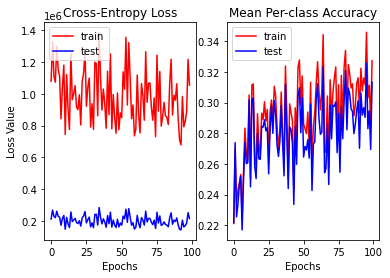

In [22]:
# plot Loss and Accuracy

plt.subplot(1,2,1)
A=np.arange(0,loss1.shape[0]-1,1)
plt.plot(A,loss1[1:],'-r')
plt.plot(A,loss2[1:],'-b')
plt.legend(('train', 'test'), loc='upper left') 
plt.title('Cross-Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')

AA=np.arange(0,loss1.shape[0],1)
plt.subplot(1,2,2)
plt.plot(AA,Sta_trAcc,'-r')
plt.plot(AA,Sta_tsAcc,'-b')
plt.title('Accuracy')
plt.xlabel('Epochs')
#plt.ylabel('Accuracy')
plt.legend(('train', 'test'), loc='upper left') 
plt.show()

In [ ]:
# confusion matrix 
def ConfusionM(X,Y,W):  
    
    Y_pred=softmax(np.dot(X,W))      #N*3
    N=Y_pred.shape[0]   
    m=np.argmax(Y_pred, axis=1)  #col
    n=np.argmax(Y, axis=1)
    M=np.zeros((5,5))
    for i in range(7):
        M[m[i],n[i]] =M[m[i],n[i]]+1
        
    return M
                

   

In [118]:
m=np.array([0,1,1,1,2,4,1])
n=np.array([1,1,3,4,3,2,1])

M=np.zeros((5,5))
for i in range(7):
    M[m[i],n[i]] =M[m[i],n[i]]+1           
print(M)
           
np.unique(m).shape[0]

[[0. 1. 0. 0. 0.]
 [0. 2. 0. 1. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


4

In [103]:
for i in range(7):
    M[(m(i),n(i)] = M[(m(i),n(i)]+1
type(M[3,2])

numpy.float64

In [185]:
MM=np.array([[2, 2, 2], [10, 10, 11],[2, 9, 2]])

N=np.sum(MM,axis=1,keepdims=True)  #row
print(N)
A=MM/N
A

[[ 2  2  2]
 [10 10 11]
 [ 2  9  2]]
[[ 6]
 [31]
 [13]]


array([[0.33333333, 0.33333333, 0.33333333],
       [0.32258065, 0.32258065, 0.35483871],
       [0.15384615, 0.69230769, 0.15384615]])

In [160]:
A=np.array([6,5,2])
A/13

array([0.46153846, 0.38461538, 0.15384615])

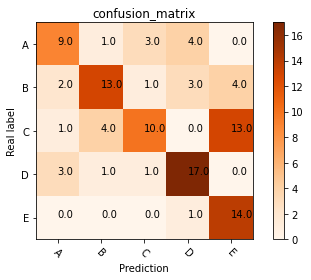

In [191]:
#confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
classes = ['A','B','C','D','E']
confusion_matrix = np.array([(9,1,3,4,0),(2,13,1,3,4),(1,4,10,0,13),(3,1,1,17,0),(0,0,0,1,14)],dtype=np.float64)

plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Oranges)  #按照像素显示出矩阵
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=-45)
plt.yticks(tick_marks, classes)

thresh = confusion_matrix.max() / 2.
#iters = [[i,j] for i in range(len(classes)) for j in range((classes))]
#ij配对，遍历矩阵迭代器
iters = np.reshape([[[i,j] for j in range(5)] for i in range(5)],(confusion_matrix.size,2))
for i, j in iters:
    plt.text(j, i, format(confusion_matrix[i, j]))   #显示对应的数字

plt.ylabel('Real label')
plt.xlabel('Prediction')
plt.tight_layout()
plt.show()

In [ ]:
def plotconfusionM(confusion_matrix)
    classes = ['1','2','3','4','5','6','7','8','9','10']
    #confusion_matrix = np.array([(9,1,3,4,0),(2,13,1,3,4),(1,4,10,0,13),(3,1,1,17,0),(0,0,0,1,14)],dtype=np.float64)

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Oranges)  #show the matrix as pixels
    plt.title('confusion_matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=-45)
    plt.yticks(tick_marks, classes)

    thresh = confusion_matrix.max() / 2.
    #iters = [[i,j] for i in range(len(classes)) for j in range((classes))]
    #ij配对，遍历矩阵迭代器
    iters = np.reshape([[[i,j] for j in range(10)] for i in range(10)],(confusion_matrix.size,2))
    for i, j in iters:
        plt.text(j, i, format(confusion_matrix[i, j]))   #显示对应的数字

    plt.ylabel('Real label')
    plt.xlabel('Prediction')
    plt.tight_layout()
    plt.show()